# Processing the Collected Data

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("BA_DataSet.csv")

## Organizing Data

In [3]:
df

,Unnamed: 0,reviews,Rota,Seat_Type
0,0,✅ Trip Verified | Despite boarding being the u...,London to Santiago,Business Class
1,1,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro,Business Class
2,2,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London,Economy Class
3,3,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich,Economy Class
4,4,✅ Trip Verified | British Airways has a total...,Frankfurt to London City,Economy Class
...,...,...,...,...
995,995,✅ Trip Verified | London to Boston. I was sea...,London to Boston,Economy Class
996,996,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London,Business Class
997,997,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London,Economy Class
998,998,✅ Trip Verified | Buenos Aires to London. We ...,Buenos Aires to London,Economy Class


In [4]:
df.columns = ["Index", "Approval_Status_and_Review", "Route", "Seat_Type"]

In [5]:
df

,Index,Approval_Status_and_Review,Route,Seat_Type
0,0,✅ Trip Verified | Despite boarding being the u...,London to Santiago,Business Class
1,1,"Not Verified | Flight cancelled, no crew! 9th...",London Heathrow to Faro,Business Class
2,2,"Not Verified | The worst service ever, my bag...",Kuwait to Lisbon via London,Economy Class
3,3,✅ Trip Verified | 4/4 flights we booked this ...,London to Munich,Economy Class
4,4,✅ Trip Verified | British Airways has a total...,Frankfurt to London City,Economy Class
...,...,...,...,...
995,995,✅ Trip Verified | London to Boston. I was sea...,London to Boston,Economy Class
996,996,✅ Trip Verified | Stockholm to London. Standar...,Stockholm to London,Business Class
997,997,✅ Trip Verified | Amsterdam to London arrived...,Amsterdam to London,Economy Class
998,998,✅ Trip Verified | Buenos Aires to London. We ...,Buenos Aires to London,Economy Class


In [6]:
df[['Approval_Status', 'Review']] = df['Approval_Status_and_Review'].str.split('|', expand=True)

In [7]:
df = df.drop(columns=['Approval_Status_and_Review'])

In [8]:
df = df.drop(columns=['Index'])

In [9]:
df.head()

,Route,Seat_Type,Approval_Status,Review
0,London to Santiago,Business Class,✅ Trip Verified,Despite boarding being the usual free for all...
1,London Heathrow to Faro,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202..."
2,Kuwait to Lisbon via London,Economy Class,Not Verified,"The worst service ever, my baggage did not a..."
3,London to Munich,Economy Class,✅ Trip Verified,4/4 flights we booked this holiday were dela...
4,Frankfurt to London City,Economy Class,✅ Trip Verified,British Airways has a total lack of respect ...


In [10]:
df["Approval_Status"] = df["Approval_Status"].str.replace("✅", "").str.strip()

In [11]:
df

,Route,Seat_Type,Approval_Status,Review
0,London to Santiago,Business Class,Trip Verified,Despite boarding being the usual free for all...
1,London Heathrow to Faro,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202..."
2,Kuwait to Lisbon via London,Economy Class,Not Verified,"The worst service ever, my baggage did not a..."
3,London to Munich,Economy Class,Trip Verified,4/4 flights we booked this holiday were dela...
4,Frankfurt to London City,Economy Class,Trip Verified,British Airways has a total lack of respect ...
...,...,...,...,...
995,London to Boston,Economy Class,Trip Verified,London to Boston. I was seated next to a cus...
996,Stockholm to London,Business Class,Trip Verified,Stockholm to London. Standard configuration o...
997,Amsterdam to London,Economy Class,Trip Verified,Amsterdam to London arrived 33 minutes late ...
998,Buenos Aires to London,Economy Class,Trip Verified,Buenos Aires to London. We flew overnight Fr...


## Data Analysis 1 - Review Analysis - Good/Bad/Neutral Discrimination

In [12]:
from textblob import TextBlob

In [13]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.0:
        return "Good"
    elif analysis.sentiment.polarity < 0.0:
        return "Bad"
    else:
        return "Neutral"

In [14]:
df["Review_Type"] = df["Review"].apply(sentiment_analysis)

In [15]:
df

,Route,Seat_Type,Approval_Status,Review,Review_Type
0,London to Santiago,Business Class,Trip Verified,Despite boarding being the usual free for all...,Good
1,London Heathrow to Faro,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad
2,Kuwait to Lisbon via London,Economy Class,Not Verified,"The worst service ever, my baggage did not a...",Bad
3,London to Munich,Economy Class,Trip Verified,4/4 flights we booked this holiday were dela...,Bad
4,Frankfurt to London City,Economy Class,Trip Verified,British Airways has a total lack of respect ...,Bad
...,...,...,...,...,...
995,London to Boston,Economy Class,Trip Verified,London to Boston. I was seated next to a cus...,Good
996,Stockholm to London,Business Class,Trip Verified,Stockholm to London. Standard configuration o...,Good
997,Amsterdam to London,Economy Class,Trip Verified,Amsterdam to London arrived 33 minutes late ...,Good
998,Buenos Aires to London,Economy Class,Trip Verified,Buenos Aires to London. We flew overnight Fr...,Bad


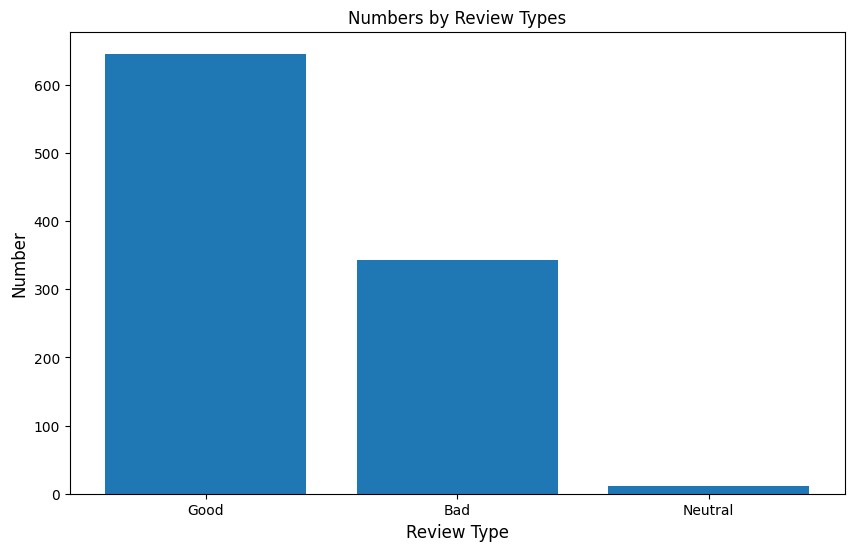

In [16]:
yorum_sayilari = df['Review_Type'].value_counts()

# Bar grafiğini oluşturun
plt.figure(figsize=(10,6))
plt.bar(yorum_sayilari.index, yorum_sayilari.values)

plt.title('Numbers by Review Types')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Review Type', fontsize=12)

plt.show()

# Data Analysis 2 - Route Analysis - From/To

In [17]:
# Find rows in the 'Route' column that do not contain 'to'
invalid_rows = df['Route'].str.contains(' to ') == False

print(df[invalid_rows])

                 Route      Seat_Type Approval_Status  \
166  London Singapore   Economy Class   Trip Verified   

                                                Review Review_Type  
166    Although it was a bit uncomfortable flight i...        Good  


In [18]:
df.isna().sum().sum()

3

In [19]:
df['Route'] = df['Route'].str.replace('London Singapore', 'London to Singapore')

In [20]:
df['Route'].fillna('Unknown to Unknown', inplace=True)

In [21]:
df[df['Route'].str.count(' to ') > 1]

,Route,Seat_Type,Approval_Status,Review,Review_Type
638,doha to londonDoha to London,Economy Class,Trip Verified,"Doha to London. Surprisingly good flight, on...",Good
938,Bucharest to London Heathrow to Los Angeles,Economy Class,Trip Verified,I understand completely why there is air rage...,Good


In [22]:
df['Route'] = df['Route'].str.replace('doha to londonDoha to London', 'Doha to London')
df['Route'] = df['Route'].str.replace('Bucharest to London Heathrow to Los Angeles', 'Bucharest to Los Angeles')

In [23]:
df[['From', 'To']] = df['Route'].str.split(' to ', expand=True)

In [24]:
df = df.drop(columns=['Route'])

In [25]:
df

,Seat_Type,Approval_Status,Review,Review_Type,From,To
0,Business Class,Trip Verified,Despite boarding being the usual free for all...,Good,London,Santiago
1,Business Class,Not Verified,"Flight cancelled, no crew! 9th September 202...",Bad,London Heathrow,Faro
2,Economy Class,Not Verified,"The worst service ever, my baggage did not a...",Bad,Kuwait,Lisbon via London
3,Economy Class,Trip Verified,4/4 flights we booked this holiday were dela...,Bad,London,Munich
4,Economy Class,Trip Verified,British Airways has a total lack of respect ...,Bad,Frankfurt,London City
...,...,...,...,...,...,...
995,Economy Class,Trip Verified,London to Boston. I was seated next to a cus...,Good,London,Boston
996,Business Class,Trip Verified,Stockholm to London. Standard configuration o...,Good,Stockholm,London
997,Economy Class,Trip Verified,Amsterdam to London arrived 33 minutes late ...,Good,Amsterdam,London
998,Economy Class,Trip Verified,Buenos Aires to London. We flew overnight Fr...,Bad,Buenos Aires,London


### 'Via' Cleaning - Transfer Segregation

In [26]:
invalid_rows_from = df['From'].str.contains('via')

print(df[invalid_rows_from])

          Seat_Type Approval_Status  \
81  Premium Economy   Trip Verified   

                                               Review Review_Type  \
81   My husband and I booked seats within our prem...         Bad   

                    From                To  
81  Sydney via Singapore  London Heathrow   


In [27]:
invalid_rows_to = df['To'].str.contains('via')

print(df[invalid_rows_to])

           Seat_Type Approval_Status  \
2      Economy Class    Not Verified   
10     Economy Class   Trip Verified   
11   Premium Economy   Trip Verified   
19     Economy Class   Trip Verified   
28     Economy Class   Trip Verified   
..               ...             ...   
982    Economy Class   Trip Verified   
985   Business Class   Trip Verified   
987    Economy Class   Trip Verified   
992    Economy Class   Trip Verified   
993  Premium Economy   Trip Verified   

                                                Review Review_Type  \
2      The worst service ever, my baggage did not a...         Bad   
10     My recent experience with British Airways wa...        Good   
11     This is to express our displeasure and conce...        Good   
19     8 months have passed and still wasting my ti...         Bad   
28     They lost my baggage in a very simple situat...        Good   
..                                                 ...         ...   
982    We have been loyal cus

In [28]:
# Separate 'From' and 'To' columns by the word 'via'
df.loc[invalid_rows_from, 'Transfer'] = df.loc[invalid_rows_from, 'From'].str.split('via').str[1]
df.loc[invalid_rows_from, 'From'] = df.loc[invalid_rows_from, 'From'].str.split('via').str[0]

df.loc[invalid_rows_to, 'Transfer'] = df.loc[invalid_rows_to, 'To'].str.split('via').str[1]
df.loc[invalid_rows_to, 'To'] = df.loc[invalid_rows_to, 'To'].str.split('via').str[0]

In [29]:
df.isna().sum().sum()

817

### Keep Cleaning

In [30]:
print("Most common 'From' values:")
print(df['From'].value_counts().head(10))

print("\nMost common 'To' values:")
print(df['To'].value_counts().head(10))

Most common 'From' values:
From
London             281
London Heathrow     78
Gatwick             37
Heathrow            23
Johannesburg        19
Vancouver           15
Los Angeles         13
New York            13
Cape Town           12
San Francisco       12
Name: count, dtype: int64

Most common 'To' values:
To
London             220
London Heathrow     68
London              23
Gatwick             23
Cape Town           16
Malaga              13
Johannesburg        11
Heathrow            11
London City         10
Glasgow             10
Name: count, dtype: int64


In [31]:
# Remove spaces at the beginning and end of data in columns
df['From'] = df['From'].str.strip()
df['To'] = df['To'].str.strip()
df['Transfer'] = df['Transfer'].str.strip()

In [32]:
df['From'] = df['From'].str.replace('London City', 'London')
df['From'] = df['From'].str.replace('LondonCity', 'London')
df['From'] = df['From'].str.replace('London Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('LondonLondon', 'London')
df['From'] = df['From'].str.replace('London Gatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('LondonGatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('Gatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['From'] = df['From'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['From'] = df['From'].str.replace('London Heaathrow', 'London/Heathrow')

In [33]:
df['To'] = df['To'].str.replace('London City', 'London')
df['To'] = df['To'].str.replace('LondonCity', 'London')
df['To'] = df['To'].str.replace('London Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('LondonLondon', 'London')
df['To'] = df['To'].str.replace('London Gatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('LondonGatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('Gatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('London/London/Gatwick', 'London/Gatwick')
df['To'] = df['To'].str.replace('London/London/Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('London-London/Heathrow', 'London/Heathrow')
df['To'] = df['To'].str.replace('London Heaathrow', 'London/Heathrow')

In [34]:
print("Most common 'From' values:")
print(df['From'].value_counts())

Most common 'From' values:
From
London             288
London/Heathrow    102
London/Gatwick      48
Johannesburg        19
Vancouver           15
                  ... 
Preveza              1
Aberdeen             1
Ottawa               1
Nashville            1
Nassau               1
Name: count, Length: 165, dtype: int64


In [35]:
print("\nMost common 'To' values:")
print(df['To'].value_counts())


Most common 'To' values:
To
London             254
London/Heathrow     87
London/Gatwick      31
Los Angeles         17
Cape Town           16
                  ... 
Portland             1
Moscow               1
Detroit              1
Porto                1
San Fransisco        1
Name: count, Length: 191, dtype: int64


In [36]:
print("Most common 'Transfer' values:")
print(df['Transfer'].value_counts())

Most common 'Transfer' values:
Transfer
London                     129
Heathrow                    14
Singapore                   12
London Heathrow             10
Gatwick                      3
Miami / Madrid               1
Johannesburg / Heathrow      1
Barcelona                    1
Singapore / London           1
Copenhagen                   1
London / Singapore           1
Chicago                      1
Dublin                       1
London / Seattle             1
Chicago / London             1
Toronto / London             1
Los Angeles                  1
Doha                         1
London,                      1
Geneva                       1
Name: count, dtype: int64


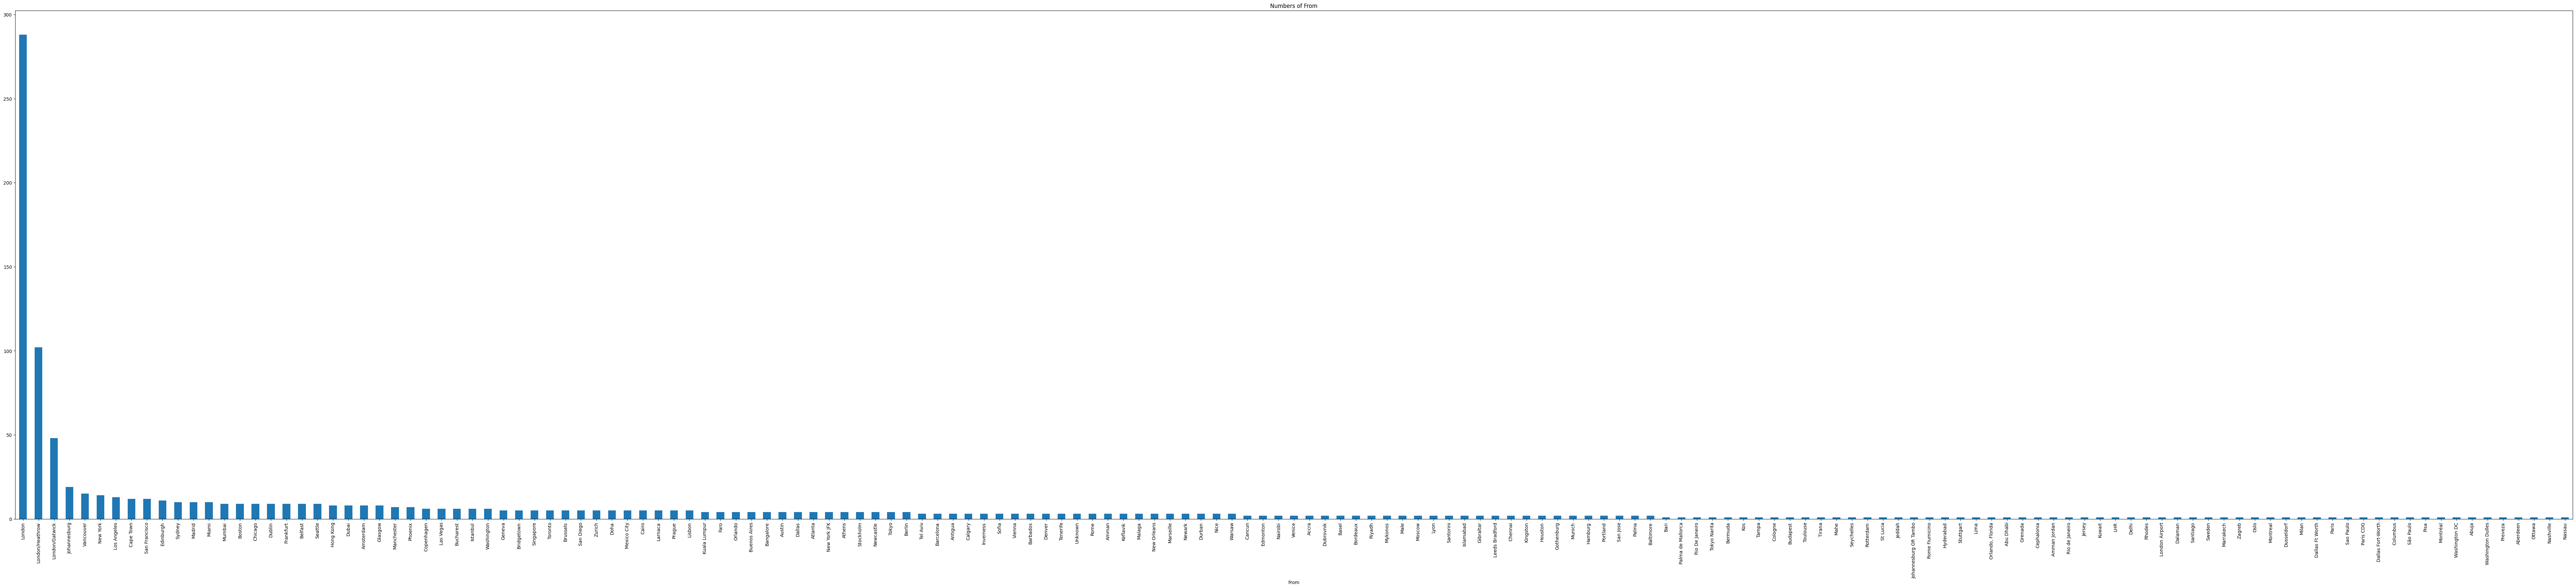

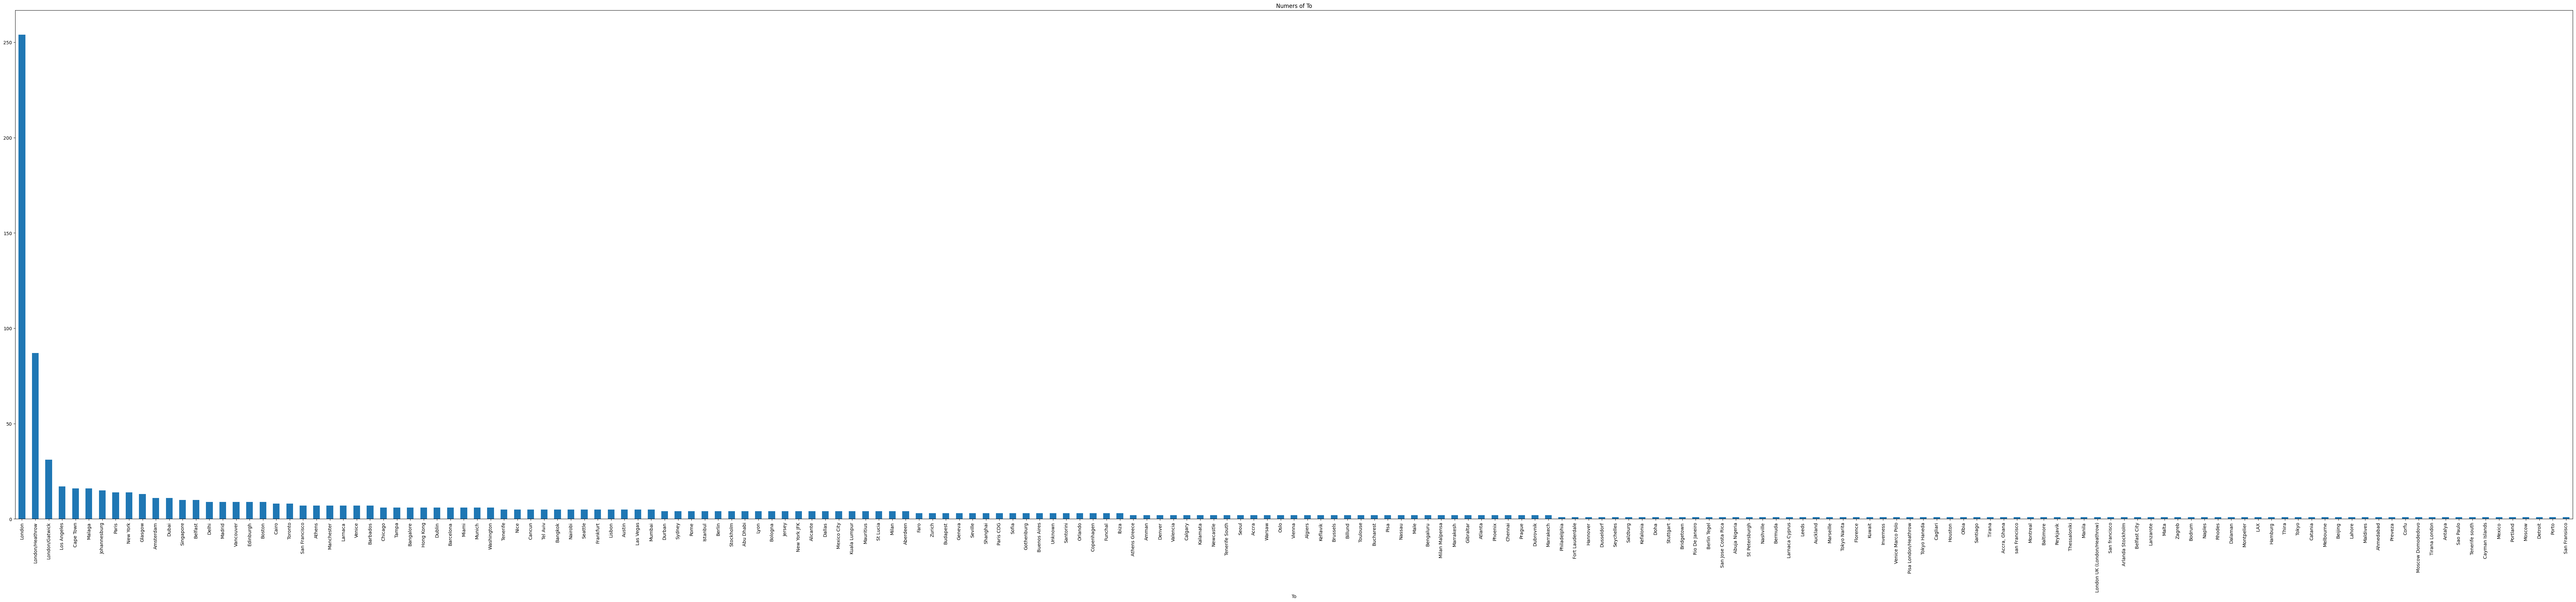

In [37]:
# Plotting a chart for the 'From' column
nereden_counts = df['From'].value_counts()
plt.figure(figsize=(100,20))
nereden_counts.plot(kind='bar')
plt.title('Numbers of From')
plt.show()

# Plotting a chart for the 'To' column
nereye_counts = df['To'].value_counts()
plt.figure(figsize=(100,20))
nereye_counts.plot(kind='bar')
plt.title('Numers of To')
plt.show()